In [1]:
from matplotlib import pyplot as plt
import numpy as np

from src.image_process.image_io import LoadImage

import src.image_process.pre_process as prep

import src.image_process.mask.mask_getters as maget

from src.image_process.edp_center.center_optimization.opt_funcs import Area
from src.image_process.edp_center.centroid import get_centroid
from src.image_process.edp_center.center_optimization.optimization import optimize_center

from src.image_process.diffraction_pattern import eDiffractionPattern
from src.image_process.polar.polar_representation import PolarRepresentation
from src.image_process.polar.rotational_average import RotationalAverage

In [2]:
file_path = 'data/25 cm 16f 5s ouro 8s com fundo dark.dm3'
load_image = LoadImage(file_path=file_path)

data = load_image.data

In [13]:
mean_mask = maget.MeanTreshMask(.1)
mask = maget.superpose_masks(data, [mean_mask])

In [14]:
penalty_func = Area(data, mask).get_penalty_func()
centroid = get_centroid(data)
center = optimize_center(penalty_func, data.shape, initial_guess=centroid)
center

(np.float64(2050.0162620665033), np.float64(2084.9999987435194))

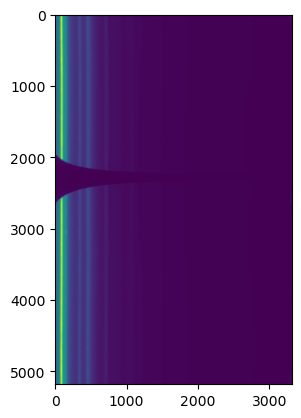

In [15]:
edp = eDiffractionPattern(data, center, mask)
polar_representation = PolarRepresentation(edp=edp)

polar_representation.radial_range = (0.06, .7)

plt.imshow(polar_representation.polar_image)

In [16]:
from src.image_process.ellipse.elp_params import EllipseParams

ellipse_params = EllipseParams(edp=edp)


In [17]:
params = ellipse_params.measure_ellipse_params()
params

{'axis_ratio': np.float64(1.0093411674362553),
 'orientation': np.float64(157.80724496771097)}

In [8]:
from src.image_process.ellipse.elp_correction import correct_ellipse

res = correct_ellipse(edp = edp, ellipse_params = params)

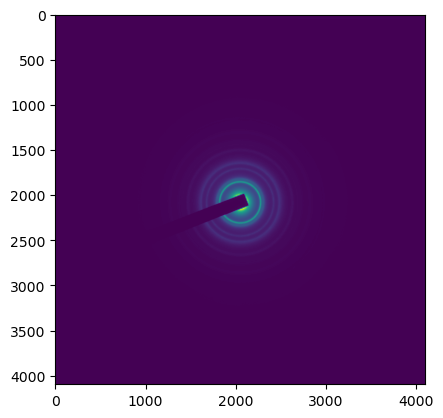

In [11]:
plt.imshow(res)

In [12]:
data = res.copy()